In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
def backtest_SMA(ticker, prices, period=20) :
    sma = pd.DataFrame()
    sma["Close"] = prices
    sma["SMA"] = prices.rolling(window=period).mean()
    sma["Signal"] = np.where(sma["Close"] > sma["SMA"], 1, -1)
    sma["Change"] = sma["Signal"].diff()
    sma["Trade"] = 0
    sma["In_position"] = 0
    in_position = False
    for i in range(1, len(sma)) :
        if sma["Change"].iloc[i] == 2 :
            if not in_position :
                sma.loc[sma.index[i], "Trade"] = 1
                in_position = True
                sma.loc[sma.index[i], "In_Position"] = 1

        elif sma["Change"].iloc[i] == -2 :
            if in_position :
                sma.loc[sma.index[i], "Trade"] = -1
                in_position = False
                sma.loc[sma.index[i], "In_Position"] = -1

    buys = sma[sma["Trade"] == 1]
    sells = sma[sma["Trade"] == -1]
    profits = []
    n_trades = min(len(buys), len(sells))
    for k in range(n_trades) :
        buy_price = buys["Close"].iloc[k]
        sell_price = sells["Close"].iloc[k]
        profit = ((sell_price - buy_price) / buy_price) * 100
        profits.append(profit)

    #résultats
    print(f" \n Performances -- {ticker}")
    print(f"Nombre de trades passés : {n_trades}")
    print(f"Taux de réussite : {(np.array(profits) > 0).sum() / n_trades * 100 :.1f}%")
    print(f"Profit total : {np.sum(profits):.2f}%")
    print(f"Profit moyen : {np.mean(profits):.2f}%")
    print(f"Meilleur trade : {np.max(profits):.2f}%")
    print(f"Pire trade : {np.min(profits):.2f}%")
    
    #Illustration SMA
    plt.figure(figsize=(14, 7))
    plt.title('SMA', fontsize = 16, fontweight ='bold')
    plt.plot(sma.index, sma["Close"], label="APPLE")
    plt.plot(sma.index, sma["SMA"], label="SMA")
    plt.xlabel('Date', fontsize = 12)
    plt.ylabel('Prix', fontsize = 12)
    plt.legend(fontsize = 12)
    plt.grid(True, alpha = 0.3)
    plt.tight_layout()
    plt.show()

    return sma, profits

In [91]:
def buy_and_hold(ticker, prices) :
    returns = prices.pct_change().mean(axis=1)
    cumulative = (1 + returns).cumprod()
    print(f"Performance Buy & Hold: {(cumulative.iloc[-1] - 1) * 100 :.2f}%")
    return cumulative

In [92]:
apple = yf.download("AAPL", start= "2024-10-30", end="2025-10-30", interval="1h", auto_adjust=True)
prix = apple["Close"]

[*********************100%***********************]  1 of 1 completed


 
 Performances -- AAPL
Nombre de trades passés : 174
Taux de réussite : 39.7%
Profit total : 25.01%
Profit moyen : 0.14%
Meilleur trade : 7.52%
Pire trade : -3.61%


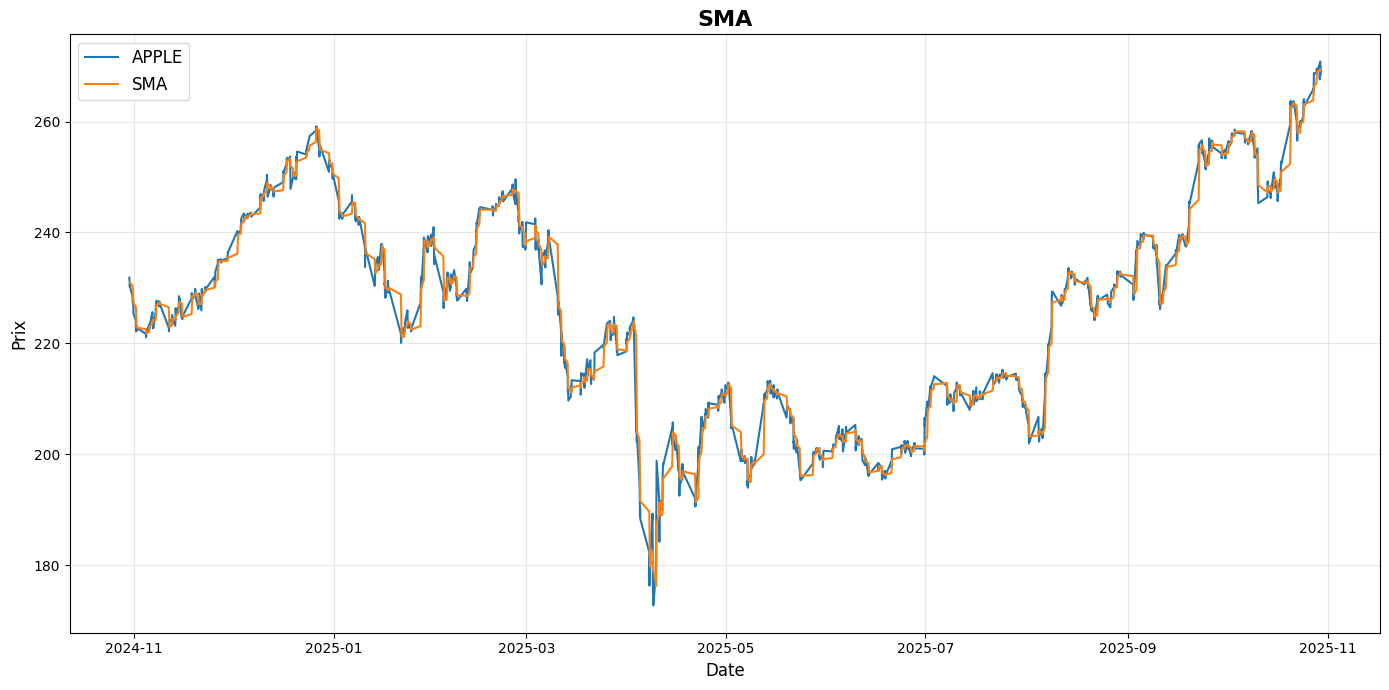

Performance Buy & Hold: 16.33%


Datetime
2024-10-30 13:30:00+00:00         NaN
2024-10-30 14:30:00+00:00    0.998685
2024-10-30 15:30:00+00:00    0.997153
2024-10-30 16:30:00+00:00    0.993018
2024-10-30 17:30:00+00:00    0.994781
                               ...   
2025-10-29 15:30:00+00:00    1.158544
2025-10-29 16:30:00+00:00    1.164194
2025-10-29 17:30:00+00:00    1.167989
2025-10-29 18:30:00+00:00    1.157207
2025-10-29 19:30:00+00:00    1.163331
Length: 1738, dtype: float64

In [93]:
sma, profits = backtest_SMA("AAPL", prix, period=7)
buy_and_hold("AAPL", prix)